# Ebay Car Sales Data

In this project we will be working with a dataset of used cars from Ebay Kleinanzeigen Car Sales.  The aim of this project is to perform data cleaning and then analyse the data of the used car listings.

In [290]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [291]:
autos = pd.read_csv('autos.csv', encoding = 'Latin-1')

In [292]:
autos

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2016-03-27 14:38:19,Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon,privat,Angebot,"$24,900",control,limousine,2011,automatik,239,q5,"100,000km",1,diesel,audi,nein,2016-03-27 00:00:00,0,82131,2016-04-01 13:47:40
49996,2016-03-28 10:50:25,Opel_Astra_F_Cabrio_Bertone_Edition___TÜV_neu+...,privat,Angebot,"$1,980",control,cabrio,1996,manuell,75,astra,"150,000km",5,benzin,opel,nein,2016-03-28 00:00:00,0,44807,2016-04-02 14:18:02
49997,2016-04-02 14:44:48,Fiat_500_C_1.2_Dualogic_Lounge,privat,Angebot,"$13,200",test,cabrio,2014,automatik,69,500,"5,000km",11,benzin,fiat,nein,2016-04-02 00:00:00,0,73430,2016-04-04 11:47:27
49998,2016-03-08 19:25:42,Audi_A3_2.0_TDI_Sportback_Ambition,privat,Angebot,"$22,900",control,kombi,2013,manuell,150,a3,"40,000km",11,diesel,audi,nein,2016-03-08 00:00:00,0,35683,2016-04-05 16:45:07


In [293]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

In [294]:
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


### Observations

* Year of Registration, PowerPs, Month of Registration, number of Pictures and the postal code are integer / float data types.  The other variables are the 'object' datatype. 

* There are 5 columns that have missing values.  One of these columns have approximately 10 000 entries missing.

* 3 of the columns contains dates and times.

* The columns classified as the 'object' type contains characters, substrings, strings, and dates and times.

* The variable names of the columns use camelcase instead of Python's preferred snakecase, which needs to be changed to a more readable format. 


In [295]:
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [296]:
from functools import reduce
  
def clean_col(str):
      
    return reduce(lambda x, y: x + ('_' if y.isupper() else '') + y, str).lower() 

new_columns = []

for c in autos.columns:
    clean_c = clean_col(c)
    new_columns.append(clean_c)
    
autos.columns = new_columns
print(autos.columns)

Index(['date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicle_type', 'year_of_registration', 'gearbox', 'power_p_s', 'model',
       'odometer', 'month_of_registration', 'fuel_type', 'brand',
       'not_repaired_damage', 'date_created', 'nr_of_pictures', 'postal_code',
       'last_seen'],
      dtype='object')


* All the column names have been changed to snake case which is more readable.

In [297]:
autos_new = autos.rename(columns = {"year_of_registration": "registration_year", 
                      "month_of_registration": "registration_month", 
                      "not_repaired_damage" : "unrepaired_damage", 
                     "date_created" : "ad_created", 
                     "power_p_s" : "power_ps"})
autos_new

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2016-03-27 14:38:19,Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon,privat,Angebot,"$24,900",control,limousine,2011,automatik,239,q5,"100,000km",1,diesel,audi,nein,2016-03-27 00:00:00,0,82131,2016-04-01 13:47:40
49996,2016-03-28 10:50:25,Opel_Astra_F_Cabrio_Bertone_Edition___TÜV_neu+...,privat,Angebot,"$1,980",control,cabrio,1996,manuell,75,astra,"150,000km",5,benzin,opel,nein,2016-03-28 00:00:00,0,44807,2016-04-02 14:18:02
49997,2016-04-02 14:44:48,Fiat_500_C_1.2_Dualogic_Lounge,privat,Angebot,"$13,200",test,cabrio,2014,automatik,69,500,"5,000km",11,benzin,fiat,nein,2016-04-02 00:00:00,0,73430,2016-04-04 11:47:27
49998,2016-03-08 19:25:42,Audi_A3_2.0_TDI_Sportback_Ambition,privat,Angebot,"$22,900",control,kombi,2013,manuell,150,a3,"40,000km",11,diesel,audi,nein,2016-03-08 00:00:00,0,35683,2016-04-05 16:45:07


In [298]:
autos_new.describe(include = 'all')

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-22 09:51:06,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


* The nr_of_pictures variable can be dropped due to the zero entries which is not useful for the analysis.
* Other variables that need investigation are power_ps and the registration year.  Both of these columns have unrealistic values.
* The odometer and price columns need to be cleaned from substrings.
* The seller and offer type entries are mostly constant.

In [299]:
reg_yr = autos_new["registration_year"]
reg_yr.unique()

array([2004, 1997, 2009, 2007, 2003, 2006, 1995, 1998, 2000, 2017, 2010,
       1999, 1982, 1990, 2015, 2014, 1996, 1992, 2005, 2002, 2012, 2011,
       2008, 1985, 2016, 1994, 1986, 2001, 2018, 2013, 1972, 1993, 1988,
       1989, 1967, 1973, 1956, 1976, 4500, 1987, 1991, 1983, 1960, 1969,
       1950, 1978, 1980, 1984, 1963, 1977, 1961, 1968, 1934, 1965, 1971,
       1966, 1979, 1981, 1970, 1974, 1910, 1975, 5000, 4100, 2019, 1959,
       9996, 9999, 6200, 1964, 1958, 1800, 1948, 1931, 1943, 9000, 1941,
       1962, 1927, 1937, 1929, 1000, 1957, 1952, 1111, 1955, 1939, 8888,
       1954, 1938, 2800, 5911, 1500, 1953, 1951, 4800, 1001], dtype=int64)

There are many incorrect registration year entries as well as unrealistic registration years.  The dataset needs to be cleaned from these entries.  Incorrect entries are any entries above 2020 and unrealistic entries are any entries that are below the year 2000 (for second hand cars).

In [300]:
autos_new.rename({"odometer": "odometer_km"}, axis=1, inplace=True)
print(autos_new.dtypes)

date_crawled          object
name                  object
seller                object
offer_type            object
price                 object
abtest                object
vehicle_type          object
registration_year      int64
gearbox               object
power_ps               int64
model                 object
odometer_km           object
registration_month     int64
fuel_type             object
brand                 object
unrepaired_damage     object
ad_created            object
nr_of_pictures         int64
postal_code            int64
last_seen             object
dtype: object


In [301]:
engine_ps = autos_new["power_ps"]
unrealistic1 = engine_ps < 50
unrealistic2 = engine_ps > 1500
cars_50 =autos_new.loc[unrealistic1, "power_ps"]            
cars_1500 = autos_new.loc[unrealistic2, "power_ps"] 

In [302]:
len(cars_50)

6298

In [303]:
len(cars_1500)

33

In [304]:
car_ps_0 = autos_new["power_ps"] == 0
cars_0 = autos_new.loc[car_ps_0, "power_ps"]

In [305]:
#  Cars that has been recorded with a ps value of 0

len(cars_0)

5500

In [306]:
autos_clean1 = autos_new[autos_new['power_ps'].between(50, 1500)]
autos_clean1

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
5,2016-03-21 13:47:45,Chrysler_Grand_Voyager_2.8_CRD_Aut.Limited_Sto...,privat,Angebot,"$7,900",test,bus,2006,automatik,150,voyager,"150,000km",4,diesel,chrysler,NaN,2016-03-21 00:00:00,0,22962,2016-04-06 09:45:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2016-03-27 14:38:19,Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon,privat,Angebot,"$24,900",control,limousine,2011,automatik,239,q5,"100,000km",1,diesel,audi,nein,2016-03-27 00:00:00,0,82131,2016-04-01 13:47:40
49996,2016-03-28 10:50:25,Opel_Astra_F_Cabrio_Bertone_Edition___TÜV_neu+...,privat,Angebot,"$1,980",control,cabrio,1996,manuell,75,astra,"150,000km",5,benzin,opel,nein,2016-03-28 00:00:00,0,44807,2016-04-02 14:18:02
49997,2016-04-02 14:44:48,Fiat_500_C_1.2_Dualogic_Lounge,privat,Angebot,"$13,200",test,cabrio,2014,automatik,69,500,"5,000km",11,benzin,fiat,nein,2016-04-02 00:00:00,0,73430,2016-04-04 11:47:27
49998,2016-03-08 19:25:42,Audi_A3_2.0_TDI_Sportback_Ambition,privat,Angebot,"$22,900",control,kombi,2013,manuell,150,a3,"40,000km",11,diesel,audi,nein,2016-03-08 00:00:00,0,35683,2016-04-05 16:45:07


A realistic minimum and maximum engine ps value for cars sold second hand are 50 ps 1500 ps.  There were 5533 datapoints in our dataset that has a ps below or above the boundaries we use for engine ps.  In 2016 or before 2016 the car with the strongest engine had a ps value of 1521, and hence the choice for a maximum ps value. 

In [307]:
autos_clean1.columns

Index(['date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'odometer_km', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'nr_of_pictures', 'postal_code',
       'last_seen'],
      dtype='object')

In [308]:
pictures = autos_clean1["nr_of_pictures"]
pictures.unique()

array([0], dtype=int64)

All the entries in the pictures column are "0", which means that this variable is not useful to us for the analysis. 

In [309]:
autos_clean2 = autos_clean1.drop('nr_of_pictures', axis =1)
autos_clean2.columns

Index(['date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'odometer_km', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'postal_code', 'last_seen'],
      dtype='object')

In [310]:
seller = autos_clean2["seller"]
seller.unique()

array(['privat'], dtype=object)

In [311]:
privat = autos_clean2["seller"] == 'privat'
privatcount = len(autos_clean2.loc[privat, 'seller'])
privatcount

43669

All of the sellers are private sellers to Ebay Car Sales

In [312]:
offer_type = autos_clean2["offer_type"] == "Angebot"
offer_typecount = len(autos_clean2.loc[offer_type, 'offer_type'])
offer_typecount

43669

All of the entries for offer type is Angebot. 

In [313]:
autos_clean2.price.head()

0    $5,000
1    $8,500
2    $8,990
3    $4,350
5    $7,900
Name: price, dtype: object

In [314]:
autos_clean2.odometer_km.head()

0    150,000km
1    150,000km
2     70,000km
3     70,000km
5    150,000km
Name: odometer_km, dtype: object

In [315]:
autos_clean2["price"] = autos_clean2["price"].str.replace('$','').str.replace(',','').astype(int)

In [316]:
autos_clean2["odometer_km"] = autos_clean2["odometer_km"].str.replace('km', '').str.replace(',', '').astype(int)

In [317]:
odometer = autos_clean2["odometer_km"]
odometer.unique()

array([150000,  70000,  50000,  80000,  10000,  30000, 125000,  90000,
        20000,  60000, 100000,   5000,  40000])

In [318]:
odometer.describe()

count     43669.000000
mean     125875.792897
std       39192.677950
min        5000.000000
25%      100000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64

In [319]:
odometer.value_counts()

150000    28072
125000     4674
100000     1905
90000      1576
80000      1328
70000      1133
60000      1085
50000       954
40000       765
30000       728
20000       693
5000        546
10000       210
Name: odometer_km, dtype: int64

In [320]:
odometer.sort_index().head()

0    150000
1    150000
2     70000
3     70000
5    150000
Name: odometer_km, dtype: int32

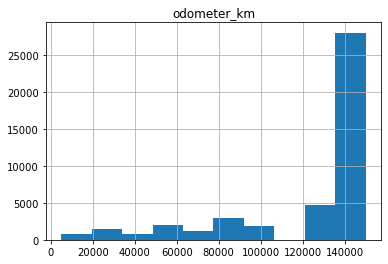

In [321]:
autos_clean2.hist(column = 'odometer_km');

In [322]:
odo_q1 = odometer.quantile(0.25)
odo_q3 = odometer.quantile(0.75)

IQR = odo_q3 - odo_q1
lowerb = odo_q1 - 3*IQR
upperb = odo_q3 + 3*IQR

In [323]:
lowerb

-50000.0

In [324]:
upperb

300000.0

In [325]:
odo_q1

100000.0

In [326]:
odo_q3

150000.0

In [327]:
IQR

50000.0

In [330]:
autos_clean2['odometer_km'].unique()

array([150000,  70000,  50000,  80000,  10000,  30000, 125000,  90000,
        20000,  60000, 100000,   5000,  40000])

In [331]:
autos_no_outliers = autos_clean2[autos_clean2["odometer_km"].between(lowerb, upperb)]
autos_no_outliers

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,5000,control,bus,2004,manuell,158,andere,150000,3,lpg,peugeot,nein,2016-03-26 00:00:00,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,8500,control,limousine,1997,automatik,286,7er,150000,6,benzin,bmw,nein,2016-04-04 00:00:00,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,8990,test,limousine,2009,manuell,102,golf,70000,7,benzin,volkswagen,nein,2016-03-26 00:00:00,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,4350,control,kleinwagen,2007,automatik,71,fortwo,70000,6,benzin,smart,nein,2016-03-12 00:00:00,33729,2016-03-15 03:16:28
5,2016-03-21 13:47:45,Chrysler_Grand_Voyager_2.8_CRD_Aut.Limited_Sto...,privat,Angebot,7900,test,bus,2006,automatik,150,voyager,150000,4,diesel,chrysler,NaN,2016-03-21 00:00:00,22962,2016-04-06 09:45:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2016-03-27 14:38:19,Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon,privat,Angebot,24900,control,limousine,2011,automatik,239,q5,100000,1,diesel,audi,nein,2016-03-27 00:00:00,82131,2016-04-01 13:47:40
49996,2016-03-28 10:50:25,Opel_Astra_F_Cabrio_Bertone_Edition___TÜV_neu+...,privat,Angebot,1980,control,cabrio,1996,manuell,75,astra,150000,5,benzin,opel,nein,2016-03-28 00:00:00,44807,2016-04-02 14:18:02
49997,2016-04-02 14:44:48,Fiat_500_C_1.2_Dualogic_Lounge,privat,Angebot,13200,test,cabrio,2014,automatik,69,500,5000,11,benzin,fiat,nein,2016-04-02 00:00:00,73430,2016-04-04 11:47:27
49998,2016-03-08 19:25:42,Audi_A3_2.0_TDI_Sportback_Ambition,privat,Angebot,22900,control,kombi,2013,manuell,150,a3,40000,11,diesel,audi,nein,2016-03-08 00:00:00,35683,2016-04-05 16:45:07


* Using the outer lower fence and outer upper bound to determine outliers, we see that we have no extreme outliers.

* We used the following formula to determine extreme outliers:

Lower boundary = Qaurtile 1 - 3*(Interquartile Rannge)
Upper boundary = Quartile 3 + 3*(Interquartile Range)

#### Inacuracies detected in the odometer readings: 

* Something to take note of is that the odometer readings are round values such as 50 000, 150 000, 40 000 etc., which means that the entries are very inaccurate.

* Another strange occurence is the fact that there are only 13 unique odometer readings in the complete dataset of 50 000 datapoints.  This is very inaccurate. 

In [332]:
price = autos_no_outliers["price"]
price.unique().shape

(2281,)

In [333]:
price.describe()

count    4.366900e+04
mean     1.035110e+04
std      5.092371e+05
min      0.000000e+00
25%      1.300000e+03
50%      3.350000e+03
75%      7.900000e+03
max      1.000000e+08
Name: price, dtype: float64

In [334]:
price.value_counts().head()

0       876
1500    628
500     613
2500    540
1200    538
Name: price, dtype: int64

In [335]:
price.value_counts().tail()

10988    1
1755     1
745      1
378      1
70000    1
Name: price, dtype: int64

In [336]:
price.value_counts().sort_index(ascending = True).head(15)

0     876
1      85
3       1
5       1
10      2
11      1
20      1
25      1
40      1
45      1
47      1
50     20
55      1
60      4
65      1
Name: price, dtype: int64

In [337]:
price.value_counts().sort_index(ascending = True).tail(15)

220000      1
259000      1
265000      1
295000      1
299000      1
345000      1
350000      1
999990      1
999999      2
1234566     1
3890000     1
10000000    1
12345678    3
27322222    1
99999999    1
Name: price, dtype: int64

I will remove the prices that is 0 or less and 10 000 000 and more.  These prices are all likely outliers.

In [338]:
autos_clean = autos_no_outliers[(autos_no_outliers['price'].between(1, 10000000))]
autos_clean

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,5000,control,bus,2004,manuell,158,andere,150000,3,lpg,peugeot,nein,2016-03-26 00:00:00,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,8500,control,limousine,1997,automatik,286,7er,150000,6,benzin,bmw,nein,2016-04-04 00:00:00,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,8990,test,limousine,2009,manuell,102,golf,70000,7,benzin,volkswagen,nein,2016-03-26 00:00:00,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,4350,control,kleinwagen,2007,automatik,71,fortwo,70000,6,benzin,smart,nein,2016-03-12 00:00:00,33729,2016-03-15 03:16:28
5,2016-03-21 13:47:45,Chrysler_Grand_Voyager_2.8_CRD_Aut.Limited_Sto...,privat,Angebot,7900,test,bus,2006,automatik,150,voyager,150000,4,diesel,chrysler,NaN,2016-03-21 00:00:00,22962,2016-04-06 09:45:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2016-03-27 14:38:19,Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon,privat,Angebot,24900,control,limousine,2011,automatik,239,q5,100000,1,diesel,audi,nein,2016-03-27 00:00:00,82131,2016-04-01 13:47:40
49996,2016-03-28 10:50:25,Opel_Astra_F_Cabrio_Bertone_Edition___TÜV_neu+...,privat,Angebot,1980,control,cabrio,1996,manuell,75,astra,150000,5,benzin,opel,nein,2016-03-28 00:00:00,44807,2016-04-02 14:18:02
49997,2016-04-02 14:44:48,Fiat_500_C_1.2_Dualogic_Lounge,privat,Angebot,13200,test,cabrio,2014,automatik,69,500,5000,11,benzin,fiat,nein,2016-04-02 00:00:00,73430,2016-04-04 11:47:27
49998,2016-03-08 19:25:42,Audi_A3_2.0_TDI_Sportback_Ambition,privat,Angebot,22900,control,kombi,2013,manuell,150,a3,40000,11,diesel,audi,nein,2016-03-08 00:00:00,35683,2016-04-05 16:45:07


There were 881 datapoints which reflected prices <=0 and prices >= 10 000 000.  These are all likely outliers.  We can take a further step in eliminating outliers with the outlier formula or the extreme outlier formula, but we will take into account that there might be a car that is $1 300 000 and low priced older cars. 

In [339]:
# A further step could be to drop the extreme outliers for which the calculations will be as follow:

# price_q1 = autos_clean['price'].quantile(0.25)
# price_q3 = autos_clean['price'].quantile(0.75)
# interQR = price_q3 - price_q1
# lowerB = price_q1 - 3*interQR
# upperB = price_q3 + 3*interQR

In [190]:
# autos_clean = autos_no_outliers[autos_no_outliers["price"].between(lowerB, upperB)]
# autos_clean

In [191]:
#There were 1421 prices which were recorded as 0.  It affects the values of the quartiles, interquartile range, therefore affecting the upper and lower fence we are using to determie outliers in the price data.  

In [340]:
len(autos_clean[autos_clean['price'] <= 0])

0

In [341]:
odo = autos_clean["odometer_km"]
odo.unique()

array([150000,  70000,  50000,  80000,  10000,  30000, 125000,  90000,
        20000,  60000, 100000,   5000,  40000])

In [342]:
fcrawled = autos_clean["date_crawled"].str[:10].value_counts(normalize=True, dropna=False)
ad_created = autos_clean["ad_created"].str[:10].value_counts(normalize=True, dropna=False)
last_seen = autos_clean["last_seen"].str[:10].value_counts(normalize=True, dropna=False)

In [343]:
fcrawled_index_pct = fcrawled.sort_index().pct_change()
create_index_pct = ad_created.sort_index().pct_change()
last_index_pct = last_seen.sort_index().pct_change()

In [344]:
fcrawled.describe()

count    34.000000
mean      0.029412
std       0.009778
min       0.001332
25%       0.029693
50%       0.032497
75%       0.035244
max       0.039146
Name: date_crawled, dtype: float64

In [345]:
ad_created.describe()

count    74.000000
mean      0.013514
std       0.016023
min       0.000023
25%       0.000023
50%       0.000187
75%       0.032421
max       0.039474
Name: ad_created, dtype: float64

In [346]:
last_seen.describe()

count    34.000000
mean      0.029412
std       0.044645
min       0.001052
25%       0.012211
50%       0.019176
75%       0.023523
max       0.225858
Name: last_seen, dtype: float64

In [347]:
fcrawled_index_pct

2016-03-05         NaN
2016-03-06   -0.441606
2016-03-07    1.531046
2016-03-08   -0.083280
2016-03-09   -0.021831
2016-03-10   -0.006479
2016-03-11    0.001449
2016-03-12    0.155572
2016-03-13   -0.580463
2016-03-14    1.343284
2016-03-15   -0.070701
2016-03-16   -0.142563
2016-03-17    0.078337
2016-03-18   -0.588584
2016-03-19    1.657658
2016-03-20    0.113220
2016-03-21   -0.029842
2016-03-22   -0.118644
2016-03-23   -0.039174
2016-03-24   -0.069681
2016-03-25    0.086056
2016-03-26    0.021277
2016-03-27   -0.053879
2016-03-28    0.154138
2016-03-29   -0.057237
2016-03-30    0.004187
2016-03-31   -0.059069
2016-04-01    0.062777
2016-04-02    0.055594
2016-04-03    0.102699
2016-04-04   -0.054925
2016-04-05   -0.643714
2016-04-06   -0.758865
2016-04-07   -0.580882
Name: date_crawled, dtype: float64

The adds for all the cars have been created over 74 days.  The different adds have been crawled for the first time on 34 different days and the different adds have been last visited on 34 different days. 

Considering the percentage change for the number of adds crawled for the first time from one date to the next, in ascending order, we see that the percentage change for the number of crawled addvertisments per day remains almost constant.

In [348]:
create_index_pct

2015-08-10         NaN
2015-09-09    0.000000
2015-11-10    0.000000
2015-12-05    0.000000
2015-12-30    0.000000
                ...   
2016-04-03    0.121514
2016-04-04   -0.055062
2016-04-05   -0.681078
2016-04-06   -0.724951
2016-04-07   -0.642857
Name: ad_created, Length: 74, dtype: float64

Considering the percentage change in the number of created adds per day, from one day to the next in ascening order, we observe that the number of created adds are reasonably constant for each day.

In [349]:
last_index_pct

2016-03-05         NaN
2016-03-06    2.933333
2016-03-07    0.214689
2016-03-08    0.381395
2016-03-09    0.340067
2016-03-10    0.077889
2016-03-11    0.205128
2016-03-12    0.949710
2016-03-13   -0.634921
2016-03-14    0.464674
2016-03-15    0.243043
2016-03-16    0.017910
2016-03-17    0.714076
2016-03-18   -0.738238
2016-03-19    1.209150
2016-03-20    0.306213
2016-03-21   -0.027180
2016-03-22    0.045402
2016-03-23   -0.122494
2016-03-24    0.049492
2016-03-25   -0.015719
2016-03-26   -0.133907
2016-03-27   -0.076596
2016-03-28    0.347158
2016-03-29    0.064994
2016-03-30    0.132762
2016-03-31   -0.052930
2016-04-01   -0.019960
2016-04-02    0.102851
2016-04-03   -0.024007
2016-04-04   -0.024598
2016-04-05    4.276431
2016-04-06    0.776471
2016-04-07   -0.406147
Name: last_seen, dtype: float64

Considering the percentage change for the number of "last seen dates" for the car adds, we observe that the percentage of adds that was last viewed from one day the next (in ascending order), remains almost constant.

In [350]:
reg_year = autos_clean["registration_year"]
reg_year.describe()

count    42788.000000
mean      2004.099935
std         42.114584
min       1937.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       9000.000000
Name: registration_year, dtype: float64

In [353]:
reg_year_2020 = autos_clean[autos_clean["registration_year"] > 2020]
len(reg_year_2020)

4

In [354]:
reg_year_2000 = autos_clean[autos_clean["registration_year"] < 2000]
len(reg_year_2000)

10960

In [355]:
reg_year_1990 = autos_clean[autos_clean["registration_year"] <= 1990]
len(reg_year_1990)

1143

There are many recorded registration years which are inacurate, since cars cannot have a registration year above 2020 and would likely, for second hand selling cars, not have a registration year below 1990.  More exploration is needed on the registration years of the cars.  

### Deciding which registration years to include for further analysis

The car industry started to reduce the usage of lead in petrol in the 1970's.  Leaded petrol was completely replaced by LRP in the year 2006, and can only support cars that are able to drive on LRP. I have also consulted a dealer who works at Cars.co.za to provide more information on second hand cars for which there is still good market value.  I have decided to cut out the cars with a registration year below 2000, and only include cars over the last 20 years. This is assuming that we are not working with classic cars, which is in a category of its own.  The maximum registration year is 2020.

In [362]:
autos_reg_yrs = autos_clean[autos_clean["registration_year"].between(2000,2020)]
autos_reg_yrs

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,5000,control,bus,2004,manuell,158,andere,150000,3,lpg,peugeot,nein,2016-03-26 00:00:00,79588,2016-04-06 06:45:54
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,8990,test,limousine,2009,manuell,102,golf,70000,7,benzin,volkswagen,nein,2016-03-26 00:00:00,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,4350,control,kleinwagen,2007,automatik,71,fortwo,70000,6,benzin,smart,nein,2016-03-12 00:00:00,33729,2016-03-15 03:16:28
5,2016-03-21 13:47:45,Chrysler_Grand_Voyager_2.8_CRD_Aut.Limited_Sto...,privat,Angebot,7900,test,bus,2006,automatik,150,voyager,150000,4,diesel,chrysler,NaN,2016-03-21 00:00:00,22962,2016-04-06 09:45:21
10,2016-03-15 01:41:36,VW_Golf_Tuning_in_siber/grau,privat,Angebot,999,test,NaN,2017,manuell,90,NaN,150000,4,benzin,volkswagen,nein,2016-03-14 00:00:00,86157,2016-04-07 03:16:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49992,2016-03-10 19:37:38,Fiat_Grande_Punto_1.4_T_Jet_16V_Sport,privat,Angebot,4800,control,kleinwagen,2009,manuell,120,andere,125000,9,lpg,fiat,nein,2016-03-10 00:00:00,68642,2016-03-13 01:44:51
49994,2016-03-22 17:36:42,Audi_A6__S6__Avant_4.2_quattro_eventuell_Tausc...,privat,Angebot,5000,control,kombi,2001,automatik,299,a6,150000,1,benzin,audi,nein,2016-03-22 00:00:00,46537,2016-04-06 08:16:39
49995,2016-03-27 14:38:19,Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon,privat,Angebot,24900,control,limousine,2011,automatik,239,q5,100000,1,diesel,audi,nein,2016-03-27 00:00:00,82131,2016-04-01 13:47:40
49997,2016-04-02 14:44:48,Fiat_500_C_1.2_Dualogic_Lounge,privat,Angebot,13200,test,cabrio,2014,automatik,69,500,5000,11,benzin,fiat,nein,2016-04-02 00:00:00,73430,2016-04-04 11:47:27


After eliminating the rows (car entries) according to our chosen minimum and maximum year of registration, we observe that a further 10 964 entries have been removed.

In [365]:
registration_new = autos_reg_yrs["registration_year"]

In [366]:
registration_new.value_counts(normalize=True).sort_index()

2000    0.078966
2001    0.074943
2002    0.070921
2003    0.077583
2004    0.077897
2005    0.080820
2006    0.079437
2007    0.067308
2008    0.065768
2009    0.062563
2010    0.048360
2011    0.049805
2012    0.039876
2013    0.024667
2014    0.020173
2015    0.011438
2016    0.026741
2017    0.031957
2018    0.010715
2019    0.000063
Name: registration_year, dtype: float64

Observing the percentages of cars for each registration year, we see that the bulk of cars for sale at eBay Car Sales have a registration year from 2000 - 2011.

In [367]:
brand = autos_reg_yrs["brand"]
brand_val = brand.value_counts()
brand_val

volkswagen        6198
bmw               3578
opel              3159
audi              3011
mercedes_benz     3008
ford              2261
renault           1458
peugeot           1052
fiat               859
skoda              691
seat               671
citroen            518
mazda              492
nissan             478
smart              477
toyota             453
hyundai            416
mini               396
kia                297
volvo              248
mitsubishi         234
alfa_romeo         234
honda              211
suzuki             200
porsche            194
chevrolet          193
sonstige_autos     165
dacia              119
chrysler           103
land_rover          71
daihatsu            69
jeep                65
daewoo              47
subaru              46
jaguar              45
saab                41
lancia              29
rover               24
lada                13
Name: brand, dtype: int64

In [368]:
brand_pct = (brand_val / brand_val.sum())*100
brand_pct

volkswagen        19.475867
bmw               11.243087
opel               9.926471
audi               9.461413
mercedes_benz      9.451986
ford               7.104701
renault            4.581448
peugeot            3.305681
fiat               2.699221
skoda              2.171317
seat               2.108472
citroen            1.627702
mazda              1.546003
nissan             1.502011
smart              1.498869
toyota             1.423454
hyundai            1.307190
mini               1.244344
kia                0.933258
volvo              0.779286
mitsubishi         0.735294
alfa_romeo         0.735294
honda              0.663022
suzuki             0.628457
porsche            0.609603
chevrolet          0.606461
sonstige_autos     0.518477
dacia              0.373932
chrysler           0.323655
land_rover         0.223102
daihatsu           0.216817
jeep               0.204248
daewoo             0.147687
subaru             0.144545
jaguar             0.141403
saab               0

Volkswagen, BMW and Opel makes up approximately 40% of the cars on sale.  Their percentages of cars are 19,48%, 11,24% and 9,93% respectively. The other 3 brands that make out part of the top 6 brands have percentages of 9,45% for Mercedes Benz, 9,46% for Audi and 7,1% for Ford.  

I will agregate over the top 6 brands of cars for sale at eBay Car Sales to obtain the mean prices for each brand.

In [369]:
top_brands = autos_reg_yrs["brand"].value_counts().index.tolist()[:6]
top_brands

['volkswagen', 'bmw', 'opel', 'audi', 'mercedes_benz', 'ford']

In [370]:
brand_mean_price = {}

brands = autos_reg_yrs["brand"].value_counts().index.tolist()[:6]

for c in brands:
    brand_rows = autos_reg_yrs[autos_reg_yrs["brand"] == c]
    mean = brand_rows["price"].mean()
    
    brand_mean_price[c] = mean
    

In [371]:
brand_mean_price

{'volkswagen': 7503.00758309132,
 'bmw': 10722.84963666853,
 'opel': 4103.694840139285,
 'audi': 11801.203254732647,
 'mercedes_benz': 10759.30352393617,
 'ford': 4945.831490490933}

In [372]:
from collections import OrderedDict

sorted_brand_means = OrderedDict([(i, brand_mean_price[i]) for i in top_brands])

In [373]:
sorted_brand_means

OrderedDict([('volkswagen', 7503.00758309132),
             ('bmw', 10722.84963666853),
             ('opel', 4103.694840139285),
             ('audi', 11801.203254732647),
             ('mercedes_benz', 10759.30352393617),
             ('ford', 4945.831490490933)])

In [379]:
brand_means_series = pd.Series(sorted_brand_means)
brand_means_series
df_brand_means = pd.DataFrame(brand_means_series, columns=['Mean_price'])
df_brand_means

,Mean_price
volkswagen,7503.007583
bmw,10722.849637
opel,4103.694840
audi,11801.203255
mercedes_benz,10759.303524
ford,4945.831490


In [75]:
# def sort_tuple_list(tup):
#     tup.sort(key=lambda tup: tup[1])
#     return tup

In [380]:
# Sorted mean prices from the most expensive to the least expensive for the top 6 car brands.
import operator
sorted_mean_prices = sorted(brand_mean_price.items(), key=operator.itemgetter(1), reverse = True)
sorted_mean_prices

[('audi', 11801.203254732647),
 ('mercedes_benz', 10759.30352393617),
 ('bmw', 10722.84963666853),
 ('volkswagen', 7503.00758309132),
 ('ford', 4945.831490490933),
 ('opel', 4103.694840139285)]

From the above table we observe that BMW, Audi and Mercedes Benz are more 
expensive brands.  Volkswagen and Opel are more affordable car brands and Volkswagens' pricing is inbetween.  

In [381]:
top_six = autos_reg_yrs["brand"].value_counts().index.tolist()[:6]
top_six

['volkswagen', 'bmw', 'opel', 'audi', 'mercedes_benz', 'ford']

In [397]:
brand_mean_mileage = {}

mileage = autos_reg_yrs["brand"].value_counts().index.tolist()[:6]

for c in mileage:
    brand_rows = autos_reg_yrs[autos_reg_yrs["brand"] == c]
    mean = brand_rows["odometer_km"].mean()
    
    brand_mean_mileage[c] = mean

In [398]:
brand_mean_mileage

{'volkswagen': 122582.28460793804,
 'bmw': 128293.73951928451,
 'opel': 125628.36340614119,
 'audi': 124295.91497841249,
 'mercedes_benz': 126575.79787234042,
 'ford': 122925.69659442724}

In [400]:
sorted_mileage_means = OrderedDict([(i, brand_mean_mileage[i]) for i in top_six])
sorted_mileage_means

OrderedDict([('volkswagen', 122582.28460793804),
             ('bmw', 128293.73951928451),
             ('opel', 125628.36340614119),
             ('audi', 124295.91497841249),
             ('mercedes_benz', 126575.79787234042),
             ('ford', 122925.69659442724)])

In [401]:
mileage_means_series = pd.Series(sorted_mileage_means)
mileage_means_series

volkswagen       122582.284608
bmw              128293.739519
opel             125628.363406
audi             124295.914978
mercedes_benz    126575.797872
ford             122925.696594
dtype: float64

In [402]:
df_mileage_means = pd.DataFrame(mileage_means_series, columns=['mean_mileage'])
df_mileage_means

,mean_mileage
volkswagen,122582.284608
bmw,128293.739519
opel,125628.363406
audi,124295.914978
mercedes_benz,126575.797872
ford,122925.696594


In [403]:
df_brand_means["mileage_means"] = mileage_means_series

In [404]:
df_brand_means

,Mean_price,mileage_means
volkswagen,7503.007583,122582.284608
bmw,10722.849637,128293.739519
opel,4103.694840,125628.363406
audi,11801.203255,124295.914978
mercedes_benz,10759.303524,126575.797872
ford,4945.831490,122925.696594


In [405]:
df_brand_means.to_csv('autos_means_compare.csv', index = False)

### Conclusion:

* There is not much variation between the mean mileages of the top 6 car brands.  The difference between the lowest and highest mean mileage is 5711 miles. 

* The prices of the top 6 car brands differ a lot.  Audi, BMW and Mercedes Benz are the more expensive brands.  Volkswagen has an inbetween mean price and Ford and Opel has lower car prices. 